# Blinkit sales analysis using python



In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
df=pd.read_csv("blinkit_data.csv") 
print(df)
df.columns

     Item Fat Content Item Identifier              Item Type  \
0             Regular           FDX32  Fruits and Vegetables   
1             Low Fat           NCB42     Health and Hygiene   
2             Regular           FDR28           Frozen Foods   
3             Regular           FDL50                 Canned   
4             Low Fat           DRI25            Soft Drinks   
...               ...             ...                    ...   
8518          low fat           NCT53     Health and Hygiene   
8519          low fat           FDN09            Snack Foods   
8520          low fat           DRE13            Soft Drinks   
8521              reg           FDT50                  Dairy   
8522              reg           FDM58            Snack Foods   

      Outlet Establishment Year Outlet Identifier Outlet Location Type  \
0                          2012            OUT049               Tier 1   
1                          2022            OUT018               Tier 3   
2        

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

### Checking for null values

In [32]:
df.isnull().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

### Checking the number of rows and number of columns in the dataset

In [33]:
df.shape

(8523, 12)

### Checking for duplicates

In [34]:
df.duplicated().sum()

np.int64(0)

## Business Insights

### Finding the mean of the cost for each product type using groupby

In [35]:

g2=df.groupby('Item Type')['Sales'].mean()
print(g2)

Item Type
Baking Goods             126.380766
Breads                   140.952669
Breakfast                141.788151
Canned                   139.763832
Dairy                    148.499208
Frozen Foods             138.503366
Fruits and Vegetables    144.581235
Hard Drinks              137.077928
Health and Hygiene       130.818921
Household                149.424753
Meat                     139.882032
Others                   132.851430
Seafood                  141.841719
Snack Foods              146.194934
Soft Drinks              131.492506
Starchy Foods            147.838023
Name: Sales, dtype: float64


In [47]:
g1=df.groupby('Item Type')['Sales'].sum().reset_index()

In [48]:
print(g1)

                Item Type        Sales
0            Baking Goods   81894.7364
1                  Breads   35379.1198
2               Breakfast   15596.6966
3                  Canned   90706.7270
4                   Dairy  101276.4596
5            Frozen Foods  118558.8814
6   Fruits and Vegetables  178124.0810
7             Hard Drinks   29334.6766
8      Health and Hygiene   68025.8388
9               Household  135976.5254
10                   Meat   59449.8638
11                 Others   22451.8916
12                Seafood    9077.8700
13            Snack Foods  175433.9204
14            Soft Drinks   58514.1650
15          Starchy Foods   21880.0274


In [38]:
print(df['Item Type'].value_counts())

Item Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


In [39]:
print(df.groupby('Item Type')['Rating'].mean())

Item Type
Baking Goods             3.983025
Breads                   3.881275
Breakfast                3.932727
Canned                   3.994299
Dairy                    3.965836
Frozen Foods             3.971145
Fruits and Vegetables    3.956169
Hard Drinks              3.907477
Health and Hygiene       3.986154
Household                3.998681
Meat                     4.023059
Others                   3.954438
Seafood                  3.959375
Snack Foods              3.948917
Soft Drinks              3.920674
Starchy Foods            3.920270
Name: Rating, dtype: float64


  Item Fat Content        Sales
0               LF   43857.1062
1          Low Fat  717390.8394
2          Regular  409413.1214
3          low fat   15071.7328
4              reg   15948.6810


<Axes: xlabel='Item Fat Content', ylabel='Sales'>

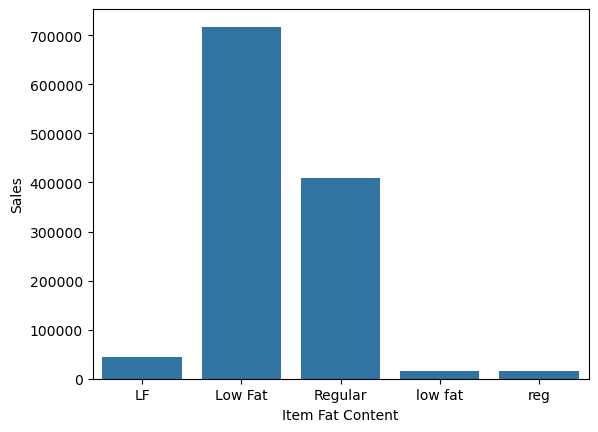

In [40]:
g3=df.groupby('Item Fat Content')['Sales'].sum().reset_index()
print(g3)

sns.barplot(x='Item Fat Content',y='Sales',data=g3)


In [41]:
print(g3)

  Item Fat Content        Sales
0               LF   43857.1062
1          Low Fat  717390.8394
2          Regular  409413.1214
3          low fat   15071.7328
4              reg   15948.6810


<Axes: xlabel='Item Fat Content', ylabel='Sales'>

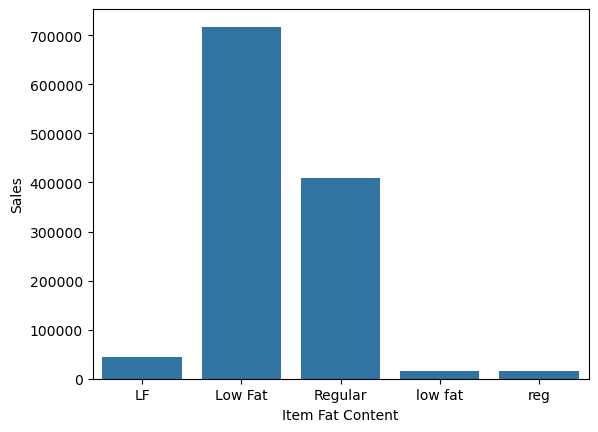

In [42]:
sns.barplot(x='Item Fat Content',y='Sales',data=g3)

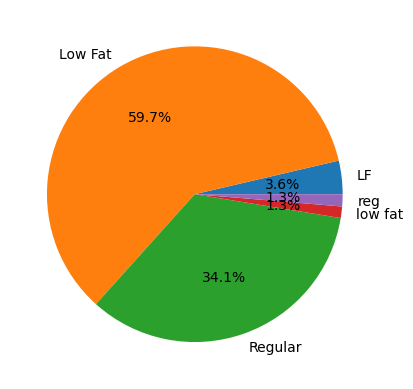

In [46]:
plt.pie(g3['Sales'],labels=g3['Item Fat Content'],autopct='%1.1f%%')
plt.show()

<Axes: xlabel='Item Type', ylabel='Sales'>

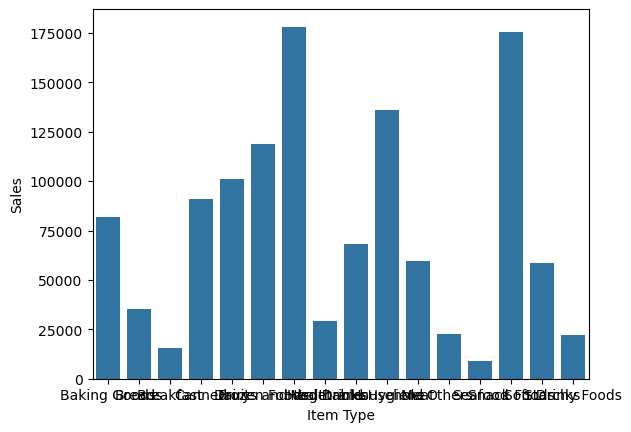

In [49]:
sns.barplot(x='Item Type',y='Sales',data=g1)

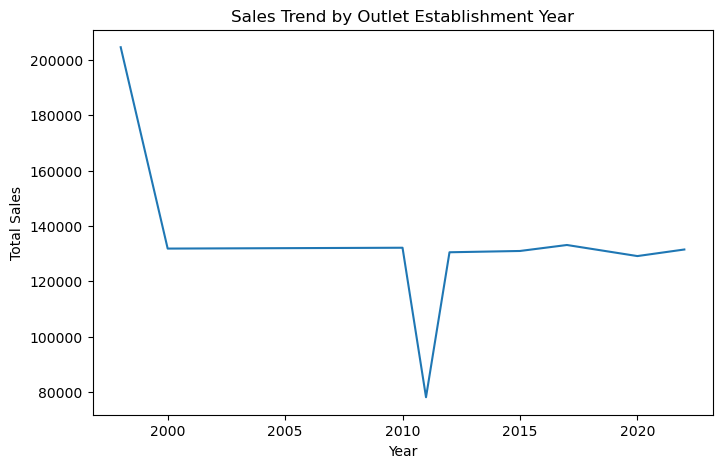

   Outlet Establishment Year        Sales
0                       1998  204522.2570
1                       2000  131809.0156
2                       2010  132113.3698
3                       2011   78131.5646
4                       2012  130476.8598
5                       2015  130942.7782
6                       2017  133103.9070
7                       2020  129103.9564
8                       2022  131477.7724


In [60]:
year_sales = df.groupby('Outlet Establishment Year')['Sales'].sum().reset_index()

plt.figure(figsize=(8,5))
plt.plot(year_sales['Outlet Establishment Year'],year_sales['Sales'],data=year_sales)
plt.title("Sales Trend by Outlet Establishment Year")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()
print(year_sales)